In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D
from tensorflow import keras


In [4]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS =3
EPOCHS = 50

In [6]:
sub_dataset = tf.keras.preprocessing.image_dataset_from_directory(
"sub_model_dataset/Tomato___Unhealthy" , shuffle = True , 
    image_size =(IMAGE_SIZE ,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 9000 files belonging to 9 classes.


In [7]:
sub_class_names = sub_dataset.class_names
sub_class_names

['Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus']

In [8]:
def get_dataset_partitions_tf(ds,train_split=0.8, val_split =0.1 , test_split=0.1, shuffle = True,shuffle_size =10000):
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed = 12)
    train_size = int(train_split *ds_size)
    val_size = int(val_split*ds_size)
    
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds , val_ds, test_ds

In [9]:
sub_train_ds , sub_val_ds , sub_test_ds = get_dataset_partitions_tf(sub_dataset)

In [10]:
sub_train_ds = sub_train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
sub_val_ds = sub_val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
sub_test_ds = sub_test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [11]:
def build_model(hp):
    # create model object
    model = keras.Sequential([
    #adding first convolutional layer    
    keras.layers.Conv2D(
        #adding filter 
        filters=hp.Int('conv_1_filter', min_value=16, max_value= 64, step= 4),
        # adding filter size or kernel size
        kernel_size=hp.Choice('conv_1_kernel', values = [3,5]),
        #activation function
        activation='relu',
        input_shape=(256,256,3),
    ),
      keras.layers.Conv2D(
        #adding filter 
        filters=hp.Int('conv_2_filter', min_value=16, max_value= 64, step= 8),
        # adding filter size or kernel size
        kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
        #activation function
        activation='relu',
        input_shape=(256,256,3),
    ),
  
    keras.layers.MaxPooling2D((2,2)),
  
    # adding second convolutional layer 
    keras.layers.Conv2D(
        #adding filter 
        filters=hp.Int('conv_3_filter', min_value=32, max_value=128, step=16),
        #adding filter size or kernel size
        kernel_size=hp.Choice('conv_3_kernel', values = [3,5]),
        #activation function
        activation='relu',
   
    ),
    keras.layers.Conv2D(
        #adding filter 
        filters=hp.Int('conv_4_filter', min_value=32, max_value=128, step=16),
        #adding filter size or kernel size
        kernel_size=hp.Choice('conv_4_kernel', values = [3,5]),
        #activation function
        activation='relu',
   
    ),
 
     keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(
        #adding filter 
        filters=hp.Int('conv_5_filter', min_value=64  , max_value= 256, step=32),
        #adding filter size or kernel size
        kernel_size=hp.Choice('conv_5_kernel', values = [3,5]),
        #activation function
        activation='relu',
   
    ),
      keras.layers.Conv2D(
        #adding filter 
        filters=hp.Int('conv_6_filter', min_value=64  , max_value= 256, step=32),
        #adding filter size or kernel size
        kernel_size=hp.Choice('conv_6_kernel', values = [3,5]),
        #activation function
        activation='relu',
   
    ),
  
    keras.layers.MaxPooling2D((2,2)),
     keras.layers.Conv2D(
        #adding filter 
        filters=hp.Int('conv_7_filter', min_value= 128 , max_value= 512, step=64),
        #adding filter size or kernel size
        kernel_size=hp.Choice('conv_7_kernel', values = [3,5]),
        #activation function
        activation='relu',
   
    ),
       keras.layers.Conv2D(
        #adding filter 
        filters=hp.Int('conv_8_filter', min_value= 256 , max_value= 512, step= 32),
        #adding filter size or kernel size
        kernel_size=hp.Choice('conv_8_kernel', values = [3,5]),
        #activation function
        activation='relu',
   
    ),
  
    keras.layers.MaxPooling2D((2,2)),
 
    # adding flatten layer    
    keras.layers.Flatten(),
    # adding dense layer    
    keras.layers.Dense(
        units=hp.Int('dense_1_units', min_value= 100, max_value= 400, step= 50),
        activation='relu'
    ),
     keras.layers.Dense(
        units=hp.Int('dense_2_units', min_value= 50 , max_value= 200, step= 25),
        activation='relu'
    ),
   
    # output layer    
    keras.layers.Dense(9, activation='softmax')
    ])
    #compilation of model
    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3])),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
    return model

In [ ]:
#!pip install -q -U keras-tuner

In [12]:
#importing random search
from keras_tuner import RandomSearch
#creating randomsearch object
tuner = RandomSearch(build_model,
                    objective='val_accuracy',
                    overwrite = 'true',
                    max_trials = 5)
# search best parameter

In [13]:
tuner.search(sub_train_ds,epochs= 10,validation_data=sub_val_ds)


Search: Running Trial #1

Value             |Best Value So Far |Hyperparameter
48                |?                 |conv_1_filter
3                 |?                 |conv_1_kernel
40                |?                 |conv_2_filter
5                 |?                 |conv_2_kernel
80                |?                 |conv_3_filter
5                 |?                 |conv_3_kernel
80                |?                 |conv_4_filter
3                 |?                 |conv_4_kernel
160               |?                 |conv_5_filter
3                 |?                 |conv_5_kernel
224               |?                 |conv_6_filter
3                 |?                 |conv_6_kernel
320               |?                 |conv_7_filter
3                 |?                 |conv_7_kernel
480               |?                 |conv_8_filter
3                 |?                 |conv_8_kernel
300               |?                 |dense_1_units
175               |?                

KeyboardInterrupt: 

In [ ]:
tuner.get_best_hyperparameters()[0].values

{'conv_1_filter': 28,
 'conv_1_kernel': 3,
 'conv_2_filter': 24,
 'conv_2_kernel': 5,
 'conv_3_filter': 112,
 'conv_3_kernel': 5,
 'conv_4_filter': 96,
 'conv_4_kernel': 5,
 'conv_5_filter': 224,
 'conv_5_kernel': 3,
 'conv_6_filter': 160,
 'conv_6_kernel': 3,
 'conv_7_filter': 128,
 'conv_7_kernel': 5,
 'conv_8_filter': 448,
 'conv_8_kernel': 3,
 'dense_1_units': 300,
 'dense_2_units': 100,
 'learning_rate': 0.001}

In [ ]:
model=tuner.get_best_models(num_models=1)[0]
#summary of best model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 28)      784       
                                                                 
 conv2d_1 (Conv2D)           (None, 250, 250, 24)      16824     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 125, 125, 24)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 121, 121, 112)     67312     
                                                                 
 conv2d_3 (Conv2D)           (None, 117, 117, 96)      268896    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 58, 58, 96)       0         
 2D)                                                    

In [ ]:
#some changes for optimal number of epochs

from keras import callbacks
earlystopping = callbacks.EarlyStopping(monitor = 'val_loss', mode ='min' , patience = 5 , restore_best_weights=True)

history = model.fit(
    sub_train_ds,
    epochs = EPOCHS,
    batch_size = BATCH_SIZE,
    verbose = 1,
    validation_data = sub_val_ds,
    callbacks = [earlystopping]

)

225/225 [==============================] - 1036s 5s/step - loss: 1.6020 - accuracy: 0.4359 - val_loss: 1.2337 - val_accuracy: 0.5603


In [ ]:
scores = model.evaluate(sub_test_ds)

29/29 [==============================] - 19s 521ms/step - loss: 1.2404 - accuracy: 0.5636


In [ ]:
scores

[1.2404216527938843, 0.5635775923728943]

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

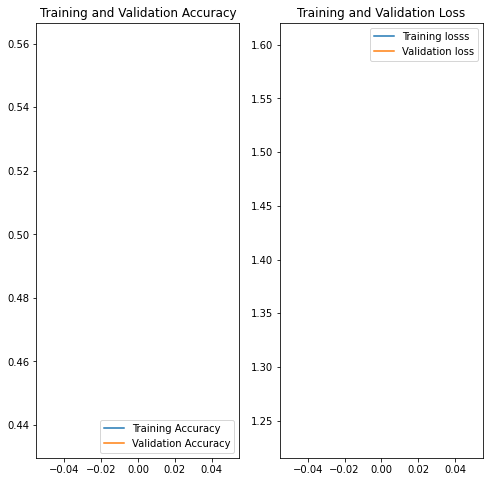

In [ ]:
plt.figure(figsize =(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), acc , label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc , label ='Validation Accuracy')
plt.legend(loc ='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS ), loss, label ='Training losss')
plt.plot(range(EPOCHS), val_loss , label ='Validation loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual lable: Tomato___Target_Spot
Predicted lable : Tomato___Spider_mites Two-spotted_spider_mite


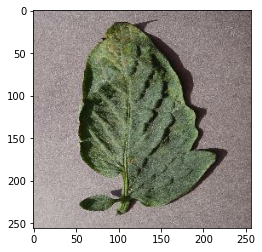

In [ ]:
import numpy as np
for images_batch, labels_batch in sub_test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual lable:", sub_class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    predict_class =  sub_class_names[np.argmax(batch_prediction[0])]
    
        
    
    print("Predicted lable :",predict_class)
